<a href="https://colab.research.google.com/github/RongBin713/Assignment/blob/main/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A.

In [17]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from scipy.io.wavfile import write

In [1]:
import csv

# List of songs with their YouTube URLs
songs = [
    {"Anime": "Attack on Titan", "Song Name": "Red Swan", "YouTube URL": "https://www.youtube.com/watch?v=r1XE8ON8fos"},
    {"Anime": "Attack on Titan", "Song Name": "Shinzou wo Sasageyo!", "YouTube URL": "https://www.youtube.com/watch?v=LKP-vZvjbh8"},
    {"Anime": "Attack on Titan", "Song Name": "Ashes on The Fire", "YouTube URL": "https://www.youtube.com/watch?v=hp_6xJWnWQQ"},
    {"Anime": "Violet Evergarden", "Song Name": "Automemories", "YouTube URL": "https://www.youtube.com/watch?v=tFt3uyggrM4"},
    {"Anime": "Violet Evergarden", "Song Name": "Lemon", "YouTube URL": "https://www.youtube.com/watch?v=S4CC6gvBGhA"},
    {"Anime": "Violet Evergarden", "Song Name": "Sincerely", "YouTube URL": "https://www.youtube.com/watch?v=uwph0dv9E6U"},
    {"Anime": "Frieren: Beyond Journey's End", "Song Name": "Anytime Anywhere", "YouTube URL": "https://www.youtube.com/watch?v=mZD6xxq-eyI"},
    {"Anime": "Frieren: Beyond Journey's End", "Song Name": "Opening 1", "YouTube URL": "https://www.youtube.com/watch?v=-jGBp5HBLFs"},
    {"Anime": "Frieren: Beyond Journey's End", "Song Name": "Opening 2", "YouTube URL": "https://www.youtube.com/watch?v=wfmYSuPiYEQ"}
]

# Define the CSV file name
csv_file = 'anime_songs.csv'

# Write the list of songs to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Anime", "Song Name", "YouTube URL"])
    writer.writeheader()
    for song in songs:
        writer.writerow(song)

print(f"The CSV file '{csv_file}' has been created successfully.")


The CSV file 'anime_songs.csv' has been created successfully.


B.

In [10]:
from collections import Counter

# Predefined melody
melody = ['C', 'E', 'G', 'C', 'E', 'G', 'A', 'G', 'E', 'C']
note_counts = Counter(melody)
most_common_note = note_counts.most_common(1)[0][0]

print(f"The most common note in the melody is {most_common_note}.")

The most common note in the melody is C.


C.

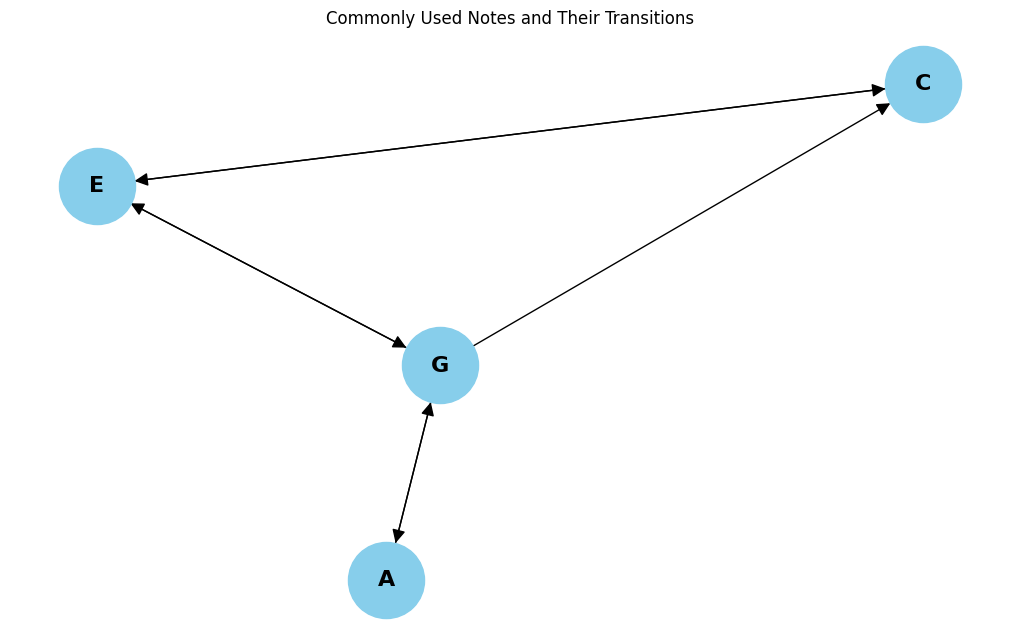

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on the melody
for i in range(len(melody) - 1):
    G.add_edge(melody[i], melody[i + 1])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=16, font_weight='bold', arrowsize=20)
plt.title("Commonly Used Notes and Their Transitions")
plt.show()

D.

In [19]:
# d. Create a 30-second simple audio piece inspired by Japanese anime BGM
duration_s = 30  # 30 seconds
sample_rate = 44100  # Sample rate in Hz
note_duration_s = duration_s / len(melody)

# Frequencies of the notes
note_frequencies = {'C': 261.63, 'D': 293.66, 'E': 329.63, 'F': 349.23, 'G': 392.00, 'A': 440.00, 'B': 493.88}

# Generate audio for each note in the melody
audio_piece = np.array([], dtype=np.float32)
for note in melody:
    t = np.linspace(0, note_duration_s, int(sample_rate * note_duration_s), endpoint=False)
    sine_wave = 0.5 * np.sin(2 * np.pi * note_frequencies[note] * t)
    audio_piece = np.concatenate((audio_piece, sine_wave))

# Normalize to 16-bit range and convert to int16
audio_piece = np.int16(audio_piece / np.max(np.abs(audio_piece)) * 32767)

# Export the audio piece to a file named with student ID (example: B240074A.wav)
student_id = 'B240074A'
audio_file_name = f"{student_id}.wav"
write(audio_file_name, sample_rate, audio_piece)

print(f"The audio piece has been created and saved as '{audio_file_name}'.")

The audio piece has been created and saved as 'B240074A.wav'.
